# Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

* You can visualize the trained decision tree by first using the export_graphviz() function

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="C:/Users/MRE/Documents/GitHub/End_to_End_ML_Project/Visualizations/iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

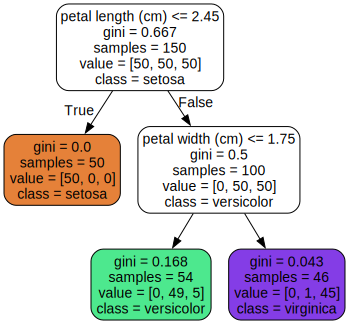

In [3]:
from graphviz import Source

directory = r"C:/Users/MRE/Documents/GitHub/End_to_End_ML_Project/Visualizations"
filename = "iris_tree.dot"
src = Source.from_file(filename=filename, directory=directory)

src.format = 'svg'
src


# Estimating Class Probabilities

In [4]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularization Hyperparameters

In [6]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(
    n_samples=150, 
    noise=0.2, 
    random_state=42
)

tree_clf1 = DecisionTreeClassifier(random_state=42)

tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

Text(0, 0.5, '')

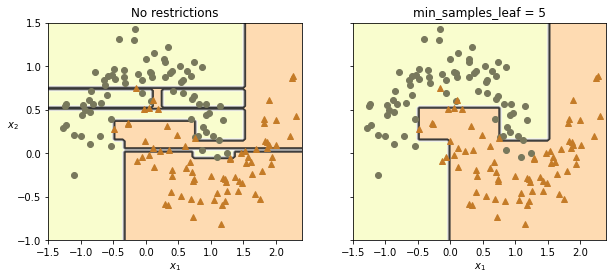

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

In [10]:
X_moons_test, y_moons_test = make_moons(
    n_samples=1000,
    noise=0.2,
    random_state=43
)

In [11]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [12]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92